In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as pl
from matplotlib import cm
from numpy import nan
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from pandas import read_csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/specolombiahackathon/202104/main/AVANZADO/adv_train_data.csv')

In [3]:
print(df.shape)

(800, 45)


In [4]:
df.fillna(df.mean(), inplace=True)
# replace empty string with NaN
df.replace(r'^\s*$', np.nan, regex=True)
# count the number of NaN values in each column
print('NaN - Fields')
df['RECOVERY'] = df['RECOVERY'].fillna("")
print(df.isnull().sum())
# summarize the shape of the data with missing rows removed
print(df.shape)

NaN - Fields
CASENAME                 0
Depth                    0
Area                     0
RESTHICK                 0
PRESS                    0
TEMP                     0
OILGRAV                  0
SOLGOR                   0
Visco                    0
Psat                     0
Bo                       0
FLUIDTYPE               14
WATSAL                   0
Aquifer                 53
POROSITY                 0
NTG                      0
PERM                     0
CONWATER                 0
PERM.AQUIFER             0
OOIP                     0
RF                       0
RFmax                    0
Np                       0
Nw                       0
Ng                       0
Nwi                      0
GOR                      0
SWx                      0
RELPERM.RESSAT.Kro       0
RELPERM.ENDPOINT.Kro     0
RELPERM.ENDPOINT.Krw     0
RELPERM.EXPON.Kro        0
RELPERM.EXPON.Krw        0
PROD.PI                  0
WINJ.PI                  0
PROD_TIME                0
Field.OILRATE  

In [5]:
print(df['RECOVERY'].unique())

['Water Flooding' 'Primary' 'Miscible Gas Inejction' 'Non Commercial' ''
 'Polymer Flooding' 'Gas Cycling' 'Thermal']


In [6]:
conditions = [
    (df['RECOVERY'] == 'Water Flooding'),
    (df['RECOVERY'] ==  'Primary'),
    (df['RECOVERY'] ==  'Miscible Gas Inejction'), 
    (df['RECOVERY'] == 'Non Commercial'), 
    (df['RECOVERY'] == 'Polymer Flooding'),
    (df['RECOVERY'] ==  'Gas Cycling'),
    (df['RECOVERY'] ==  'Thermal')
    ]

values = [1, 2, 3, 4, 5, 6, 7]
df['recobro'] = np.select(conditions, values)

In [7]:
print(df.groupby('RECOVERY').size())

RECOVERY
                           31
Gas Cycling                17
Miscible Gas Inejction     47
Non Commercial             21
Polymer Flooding            9
Primary                   346
Thermal                     6
Water Flooding            323
dtype: int64


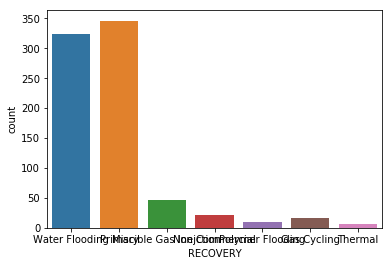

In [7]:
sns.countplot(df['RECOVERY'],label='Recobro')
plt.show()

In [8]:
df.head()

,CASENAME,Depth,Area,RESTHICK,PRESS,TEMP,OILGRAV,SOLGOR,Visco,Psat,...,Field.OILRATE,Field.WATRATE,Field.GASRATE,Field.INJWATRATE,Field.INJGASRATE,NumPROD,NumWINJ,BODP_well,RECOVERY,recobro
0,43e8ea77,7310,19.5,137,3820.0,180.0,41.2,1200.0,0.3,3439.0,...,15900.0,6600.0,0.0,24900.000000,9800.0,11.0,8.0,41923.781092,Water Flooding,1
1,16e1320d,6420,13.1,229,3500.0,168.0,13.7,80.0,91.6,1009.0,...,36000.0,43600.0,0.0,26100.000000,0.0,5.0,1.0,49129.345559,Primary,2
2,3c106751,7120,14.9,255,4250.0,162.0,39.5,310.0,1.1,1109.0,...,73800.0,20000.0,0.0,96600.000000,0.0,14.0,10.0,33378.988975,Water Flooding,1
3,e95ff0fb,10800,27.7,93,7040.0,241.0,43.2,2200.0,0.2,6384.0,...,27000.0,300.0,200.0,40683.166904,3800.0,13.0,9.0,38176.628501,Miscible Gas Inejction,3
4,b1ae336a,8490,18.8,207,3860.0,207.0,25.9,200.0,2.6,1326.0,...,54000.0,39400.0,0.0,0.000000,0.0,7.0,0.0,68328.442588,Primary,2


In [9]:
df.describe()

,Depth,Area,RESTHICK,PRESS,TEMP,OILGRAV,SOLGOR,Visco,Psat,Bo,...,PROD_TIME,Field.OILRATE,Field.WATRATE,Field.GASRATE,Field.INJWATRATE,Field.INJGASRATE,NumPROD,NumWINJ,BODP_well,recobro
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,6562.675000,20.429782,217.232500,3629.669632,175.907243,28.241550,347.549148,38.246941,1588.189840,1.126175,...,33.162125,52979.790026,62122.823219,25.671642,40683.166904,2357.945736,18.025099,9.332857,49129.345559,1.786250
std,3162.350814,8.721017,100.344331,1509.719497,43.350656,9.382178,421.238589,185.742847,1308.424258,0.142718,...,16.263394,46286.574400,96355.551004,96.616397,57437.182113,9678.361697,26.955638,24.006607,25753.783002,1.143326
min,1010.000000,2.600000,30.000000,770.000000,89.000000,11.500000,0.000000,0.200000,5.000000,1.016000,...,5.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1048.205790,0.000000
25%,3777.500000,13.900000,140.000000,2357.500000,140.750000,20.100000,100.000000,1.100000,683.500000,1.048000,...,18.775000,21375.000000,3675.000000,0.000000,0.000000,0.000000,7.000000,0.000000,31990.207861,1.000000
50%,6740.000000,19.700000,206.000000,3630.000000,176.000000,27.850000,210.000000,3.600000,1309.000000,1.075000,...,33.550000,40000.000000,30400.000000,0.000000,24100.000000,0.000000,11.000000,2.000000,49129.345559,2.000000
75%,9392.500000,26.300000,285.250000,4870.000000,213.000000,35.900000,390.000000,17.600000,2015.750000,1.137225,...,47.325000,69125.000000,70100.000000,25.671642,54475.000000,2357.945736,18.025099,9.332857,57032.268799,2.000000
max,11990.000000,43.300000,486.000000,9710.000000,267.000000,48.800000,3870.000000,3900.500000,8815.000000,1.943000,...,60.000000,334100.000000,890200.000000,1800.000000,380100.000000,129800.000000,453.000000,335.000000,129040.991108,7.000000


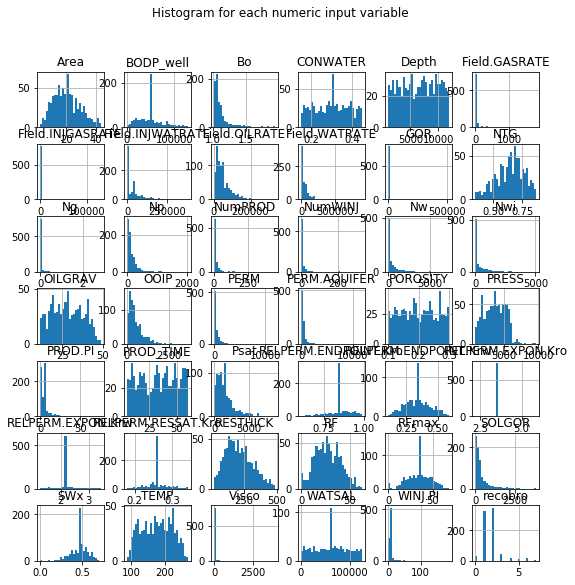

In [11]:
df.drop('RECOVERY', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('field_hist')
plt.show()

In [12]:
feature_names = ['OILGRAV', 'PRESS', 'Field.OILRATE', 'Field.WATRATE', 'Field.GASRATE','Field.INJWATRATE', 'Field.INJGASRATE', 'PROD.PI','WINJ.PI']
X = df[feature_names].values
y = df['RECOVERY'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [16]:
y_pred = classifier.predict(X_test)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  0  0  0  3  0  1]
 [ 0  2  0  0  0  3  0  1]
 [ 0  0  3  1  0  0  0  5]
 [ 0  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 63  0 14]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 16  0 44]]
                        precision    recall  f1-score   support

                             0.00      0.00      0.00         4
           Gas Cycling       1.00      0.33      0.50         6
Miscible Gas Inejction       1.00      0.33      0.50         9
        Non Commercial       0.00      0.00      0.00         2
      Polymer Flooding       0.00      0.00      0.00         1
               Primary       0.72      0.82      0.76        77
               Thermal       0.00      0.00      0.00         1
        Water Flooding       0.67      0.73      0.70        60

              accuracy                           0.70       160
             macro avg       0.42      0.28      0.31       160
          weighted avg       0.69      0.70      0.68       160

/Application

Text(0, 0.5, 'Mean Error')

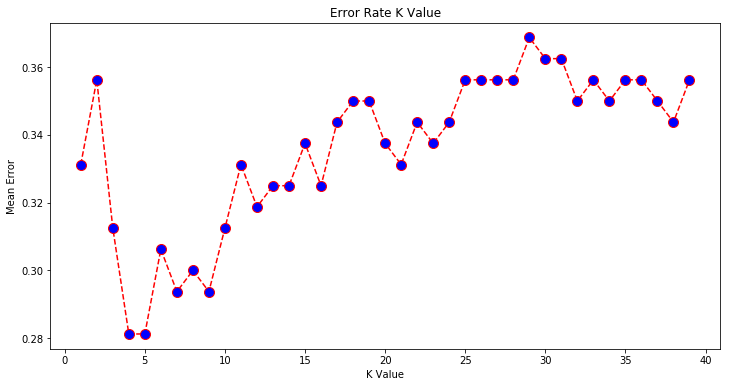

In [20]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [21]:
df.to_csv('JUAN_CEBALLOS_RECOBRO_v00.csv', index=False)

In [27]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('scatter_matrix')

AttributeError: 'numpy.ndarray' object has no attribute '_get_numeric_data'

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.72


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.68
Accuracy of LDA classifier on test set: 0.64


In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


In [24]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.73
Accuracy of SVM classifier on test set: 0.68


In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  0  0  0  1  1  0  2]
 [ 0  3  0  0  0  2  0  1]
 [ 0  0  6  1  0  0  0  2]
 [ 0  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  1  0  0]
 [ 1  0  1  0  0 64  0 11]
 [ 0  0  0  0  0  1  0  0]
 [ 1  0  2  0  0 15  0 42]]
                        precision    recall  f1-score   support

                             0.00      0.00      0.00         4
           Gas Cycling       1.00      0.50      0.67         6
Miscible Gas Inejction       0.67      0.67      0.67         9
        Non Commercial       0.00      0.00      0.00         2
      Polymer Flooding       0.00      0.00      0.00         1
               Primary       0.75      0.83      0.79        77
               Thermal       0.00      0.00      0.00         1
        Water Flooding       0.71      0.70      0.71        60

              accuracy                           0.72       160
             macro avg       0.39      0.34      0.35       160
          weighted avg       0.70      0.72      0.71       160

/Application

In [26]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
    % (n_neighbors, weights))    
    plt.show()
    plot_fruit_knn(X_train, y_train, 5, 'uniform')

NameError: name 'fruits' is not defined

([<matplotlib.axis.XTick at 0x12e80fb00>,
 <a list of 5 Text xticklabel objects>)

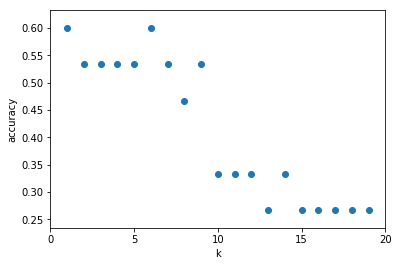

In [47]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [48]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [54]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.53


In [57]:
fruits.head

<bound method NDFrame.head of     fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      a